In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Lilian\Downloads\online_retail_II.csv\online_retail_II.csv")
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [4]:
#exploratory data analysis
df.shape
#number of rows + columns

(1067371, 8)

In [5]:
#column names
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [6]:
#data types + non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [8]:
#null values
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [9]:
#descriptive statistics
df.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [10]:
df.describe(include='object')

,Invoice,StockCode,Description,InvoiceDate,Country
count,1067371,1067371,1062989,1067371,1067371
unique,53628,5305,5698,47635,43
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-06 16:57:00,United Kingdom
freq,1350,5829,5918,1350,981330


In [13]:
#data cleaning
#drop rows with no customer ID
df.dropna(axis=0, subset=['Customer ID'], inplace=True)

In [14]:
#convert customer ID to string
df['Customer ID'] = df['Customer ID'].astype(str)

In [16]:
#remove returns(invoices starting with a C)
df=df[~df['Invoice'].astype(str).str.startswith('C')]

In [17]:
#remove negative quantities and zero prices
df = df[df['Quantity']>0]
df = df[df['Price']>0]

In [18]:
df['TotalPrice'] = df['Quantity'] * df['Price']

In [19]:
#convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [20]:
print('Data cleaned and prepped.')
df.info()

Data cleaned and prepped.
<class 'pandas.core.frame.DataFrame'>
Index: 805549 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      805549 non-null  object        
 1   StockCode    805549 non-null  object        
 2   Description  805549 non-null  object        
 3   Quantity     805549 non-null  int64         
 4   InvoiceDate  805549 non-null  datetime64[ns]
 5   Price        805549 non-null  float64       
 6   Customer ID  805549 non-null  object        
 7   Country      805549 non-null  object        
 8   TotalPrice   805549 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 61.5+ MB


In [21]:
#RFM calculation
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

In [23]:
#group by customer and calculate R, F, M
rfm_df = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda date: (snapshot_date - date.max()).days, # Recency
    'Invoice': 'nunique',                                         # Frequency
    'TotalPrice': 'sum'                                           # Monetary
})

In [25]:
# Rename the columns for clarity
rfm_df.rename(columns={'InvoiceDate': 'Recency',
                       'Invoice': 'Frequency',
                       'TotalPrice': 'MonetaryValue'}, inplace=True)

In [26]:
print("\nRFM metrics calculated:")
print(rfm_df.head())


RFM metrics calculated:
             Recency  Frequency  MonetaryValue
Customer ID                                   
12346.0          326         12       77556.46
12347.0            2          8        5633.32
12348.0           75          5        2019.40
12349.0           19          4        4428.69
12350.0          310          1         334.40


In [28]:
# Create scores using ranks to handle skewed distributions
r_labels = range(4, 0, -1) # 4 is best (most recent)
f_labels = range(1, 5)     # 4 is best (most frequent)
m_labels = range(1, 5)     # 4 is best (highest value)

# Apply qcut to the ranked data
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'].rank(method='first'), q=4, labels=r_labels)
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'].rank(method='first'), q=4, labels=f_labels)
rfm_df['M_Score'] = pd.qcut(rfm_df['MonetaryValue'].rank(method='first'), q=4, labels=m_labels)


In [29]:
#segmentation
def join_rfm(x): return str(x['R_Score']) + str(x['F_Score']) + str(x['M_Score'])
rfm_df['RFM_Segment'] = rfm_df.apply(join_rfm, axis=1)

In [30]:
# Define segment names based on scores
segment_map = {
    r'[3-4][3-4][3-4]': 'Champions',
    r'[2-4][3-4][1-4]': 'Loyal Customers',
    r'[3-4][1-2][1-4]': 'Potential Loyalists',
    r'[3-4]11': 'New Customers',
    r'2[1-2][1-4]': 'Needs Attention',
    r'1[2-4][2-4]': 'At Risk',
    r'11[1-4]': 'Lost'
}

In [31]:
rfm_df['Segment'] = rfm_df['RFM_Segment'].replace(segment_map, regex=True)

print("\nCustomer segments created successfully:")
print(rfm_df.head())


Customer segments created successfully:
             Recency  Frequency  MonetaryValue R_Score F_Score M_Score  \
Customer ID                                                              
12346.0          326         12       77556.46       2       4       4   
12347.0            2          8        5633.32       4       4       4   
12348.0           75          5        2019.40       3       3       3   
12349.0           19          4        4428.69       4       3       4   
12350.0          310          1         334.40       2       1       1   

            RFM_Segment    Segment  
Customer ID                         
12346.0       2.04.04.0  2.04.04.0  
12347.0       4.04.04.0  4.04.04.0  
12348.0       3.03.03.0  3.03.03.0  
12349.0       4.03.04.0  4.03.04.0  
12350.0       2.01.01.0  2.01.01.0  


In [32]:
#Analysis and Visualization
# Count the number of customers in each segment
segment_counts = rfm_df['Segment'].value_counts().sort_values(ascending=False)

C:\Users\Lilian\AppData\Local\Temp\ipykernel_7336\998131664.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')



Visualization saved as 'rfm_customer_segmentation.png'


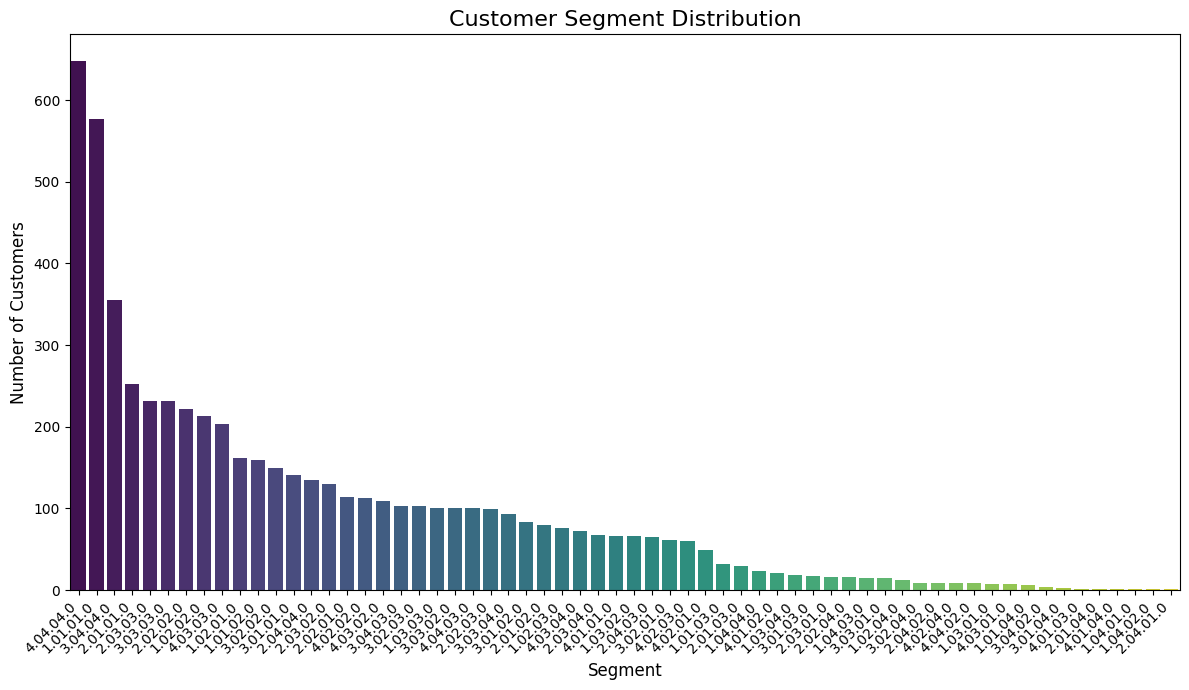

In [33]:
# --- Plotting and saving ---
plt.figure(figsize=(12, 7))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')
plt.title('Customer Segment Distribution', fontsize=16)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the figure
plt.savefig('rfm_customer_segmentation.png', dpi=300)

print("\nVisualization saved as 'rfm_customer_segmentation.png'")

C:\Users\Lilian\AppData\Local\Temp\ipykernel_7336\2060737548.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.values, y=segment_counts.index, palette='viridis')


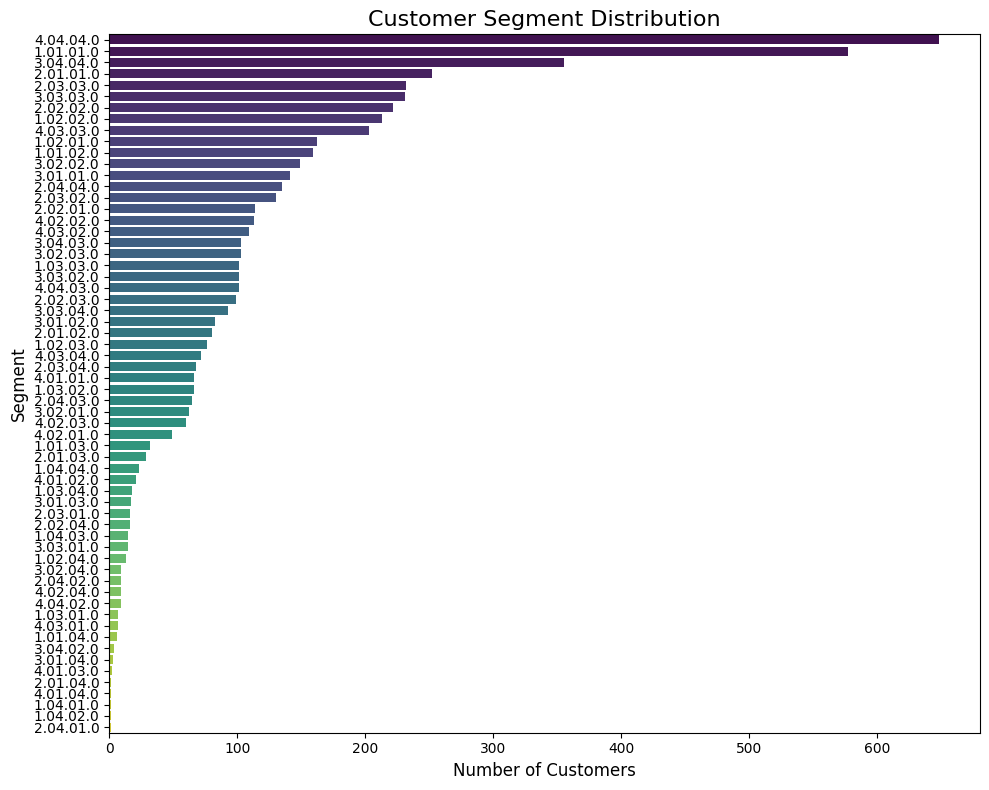

In [34]:
plt.figure(figsize=(10, 8))
# Plotting horizontally makes long labels easier to read
sns.barplot(x=segment_counts.values, y=segment_counts.index, palette='viridis')
plt.title('Customer Segment Distribution', fontsize=16)
plt.xlabel('Number of Customers', fontsize=12)
plt.ylabel('Segment', fontsize=12)
plt.tight_layout()
plt.savefig('rfm_named_segments.png', dpi=300)
plt.show()